# Lab 2 - Regression - Predicting Software Reselling Profits.

Tayko Software is a software catalog firm that sells games and educational software. It started out as a software manufacturer and then added third-party titles to its oﬀerings. It recently revised its collection of items in a new catalog, which it mailed out to its customers. This mailing yielded 2000 purchases. Based on these data, Tayko wants to devise a model for predicting the spending amount that a purchasing customer will yield. The file _Tayko.csv_ contains information on 2000 purchases. Table 6.12 describes the variables to be used **(FREQ, LAST_UPDATE, WEB, GENDER, ADDRESS_RES, ADDRESS_US, SPENDING (outcome)** in the problem (the Excel file contains additional variables).

In [20]:
import numpy as np
import pandas as pd
# load the data
tayko_df = pd.read_csv('/Users/sera/Downloads/Tayko.csv')

In [21]:
tayko_df.rename(columns = {'Web order':'Web_order'}, inplace = True)
tayko_df.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web_order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [22]:
tayko_df = tayko_df.loc[:,['Freq','last_update_days_ago', 'Web_order','Gender=male','Address_is_res','US','Spending']]

In [23]:
tayko_df.head(100)

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
5,1,1995,0,0,1,1,0
6,2,1498,0,0,1,1,0
7,1,3397,0,1,0,1,0
8,4,525,1,1,0,1,489
9,1,3215,0,0,0,1,174


In [24]:
tayko_df.shape

(2000, 7)

In [25]:
# check data types of variables in the data
tayko_df.dtypes

Freq                    int64
last_update_days_ago    int64
Web_order               int64
Gender=male             int64
Address_is_res          int64
US                      int64
Spending                int64
dtype: object

__6.2.a__ Explore the spending amount by creating a pivot table for the categorical variables (by Gender, Address_is_res) and computing the average and standard deviation of spending in each category. 

__Answer:__ 6.2.a

In [26]:
gender = tayko_df.groupby(['Gender=male'])
gender.agg({'Spending':['mean','std']})

Spending           
                   mean        std
Gender=male                       
0            107.339642  190.83233
1             98.350810  183.02006

In [27]:
web_order = tayko_df.groupby(['Web_order'])
web_order.agg({'Spending':['mean','std']})

Spending            
                 mean         std
Web_order                        
0           82.902439  173.417088
1          129.199531  200.463840

__6.2.b.__ Explore the relationship between spending and each of the two continuous predictors by creating two scatterplots (Spending vs. Freq, and Spending vs. last_update_days_ago. Does there seem to be a linear relationship? 

__Answer:__ 

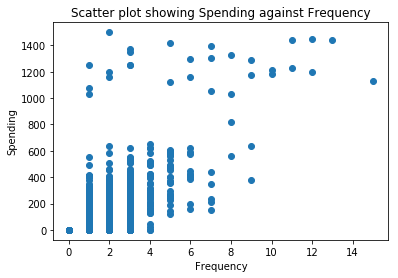

In [28]:
# plot of spending against frequency
#code here plot. remember to import required libraries
import matplotlib.pyplot as plt
%matplotlib inline

x = tayko_df['Freq']
y = tayko_df['Spending']
plt.scatter(x,y)
plt.title('Scatter plot showing Spending against Frequency')
plt.ylabel('Spending')
plt.xlabel('Frequency')
plt.show()

The overall relationship between Spending and Freq. 
It doesnt look like spending and frequency variables have a linear relationship. However, the scatterplot shows that some customers who have a high frequency also have higher spending. 

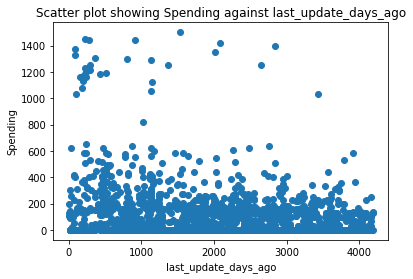

In [29]:
# plot Spending against last_update_days_ago
#scatter plot code here
import matplotlib.pyplot as plt
%matplotlib inline

x = tayko_df['last_update_days_ago']
y = tayko_df['Spending']
plt.scatter(x,y)
plt.title('Scatter plot showing Spending against last_update_days_ago')
plt.ylabel('Spending')
plt.xlabel('last_update_days_ago')
plt.show()

There appears to be no relationship between Spending and Last_Update but two groups of points similar to what we seen in case of Spending and Frequency above. However the scatter plot shows that the lesser the last_update_days_ago number the higher the speding in certain cases. 

__6.2.c.__ To fit a predictive model for spending:

__6.2.c.i.__ Partition the 2000 records into training and validation sets.

__Answer:__ 

In [30]:
# predictors and outcome
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

predictors = ['US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender=male', 'Address_is_res']
outcome = 'Spending'

X = pd.get_dummies(tayko_df[predictors], drop_first=True)
y = tayko_df[outcome]
# partition data
#train_test_split code here
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (1200, 6) Validation set: (800, 6)


__6.2.c.ii.__ Run a multiple linear regression model for Spending vs. all six predictors. Give the estimated predictive equation.

__Answer:__ 

In [31]:
# fit the regression model
tayko_lm = LinearRegression()
tayko_lm.fit(train_X,train_y)

# print coefficients
print('Intercept', tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': tayko_lm.coef_}))

Intercept 10.17629741458822
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web_order    18.628731
4           Gender=male    -9.111366
5        Address_is_res   -75.815354


The Regression equation is:

Spending = 10.1763 + (-4.620 * US) + (91.274 * Freq) + (-0.010* last_update_days_ago) + (18.629* Web_order) + (-9.111* Gender=male) + (-75.815* Address_is_res)

__6.2.c.iii.__ Based on this model, what type of purchaser is most likely to spend a large amount of money?

 __Answer:__

Based on the model the purchasers with high frequency are likely to spend more amount. Then the next is purchasers with web orders would spend more too. 

__6.2.c.vi.__ Evaluate the predictive accuracy of the model by examining its performance on the validation set.

__Answer:__



(0, 1089.4557786392043)

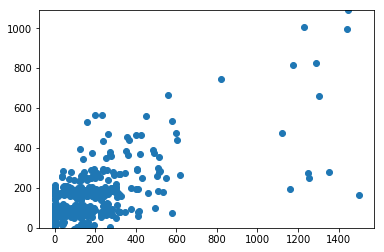

In [32]:
tayko_lm_pred = tayko_lm.predict(valid_X)
plt.scatter(valid_y,tayko_lm_pred)
plt.ylim(0,max(tayko_lm_pred))

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(valid_y, tayko_lm_pred))
print('MSE:', metrics.mean_squared_error(valid_y, tayko_lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(valid_y, tayko_lm_pred)))

MAE: 83.60097261985734
MSE: 18697.73569089105
RMSE: 136.73966392708098


__6.2.c.vii.__ Create a histogram of the model residuals. Do they appear to follow a normal distribution? How does this aﬀect the predictive performance of the model?

__Answer:__ 

The histogram is positively skewed/ right skewed which means there may be outliers in errors contributing to the skewness.

1.0


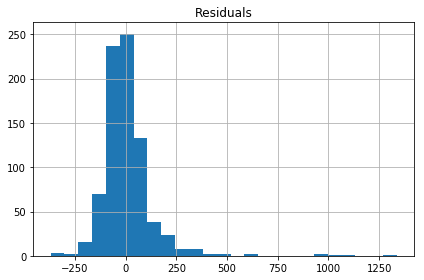

In [38]:
# compute and plot the residuals for validation data
tayko_lm_pred = tayko_lm.predict(valid_X)
all_residuals = valid_y - tayko_lm_pred

print(len(all_residuals[(all_residuals> -2000) & (all_residuals< 2000)])/len(all_residuals))

ax = pd.DataFrame({'Residuals':all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()